In [ ]:
#potential Probability of the sales enquiries

In [ ]:
Problem Statement:-
    
An online education institute sells courses to industry professionals. 

The company markets its courses on several websites and search engines like Google. 
Once these people land on the website, they might browse the courses or fill up a 
form providing their contact information and other details.
Once these forms are acquired, sales marketing  team start making calls, 
writing emails, etc. Through this process, some of the leads get converted while most do not. 
its lead conversion rate is very poor say 30 percent. 

If they successfully identify this set of enquiries, the sales conversion rate should go up as 
the sales team will now be focusing more on communicating with the potential clients rather 
than making calls to everyone. 

Goal :- find the potential Probability of the sales enquiries.
assign a score between 0 and 100 to target potential leads. 

A higher score would mean that the lead is hot, i.e. is most likely to convert 
whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [ ]:
Important Variables	Description
Prospect ID	A unique ID with which the customer is identified.
Lead Origin	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Converted	The target variable. Indicates whether a lead has been successfully converted or not.
Time Spent on Website	The total time spent by the customer on the website.
Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
Specialization	The industry domain in which the customer worked before. Includes the level ‘Select Specialization’, meaning the customer had not selected this option while filling out the form.
What is your current occupation	Indicates whether the customer is a student, unemployed or employed.
City	The city of the customer.

In [11]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [12]:
df = pd.DataFrame(pd.read_csv('Targeting_right_customer.csv'))
df.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [13]:
data=df.copy()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [15]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# missing value

In [16]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [17]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [19]:
high_null=data.isnull().sum()/len(data)
high_null.sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

In [ ]:
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Profile Score                      0.456494
Asymmetrique Profile Index                       0.456494

# an index and score has been assigned to each customer based to the form evaluation.

In [20]:
data=data.drop(["Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"],axis=1)

In [21]:
data.shape

(9240, 33)

In [24]:
# no. of unique variables
for i in data.select_dtypes("O").columns:
    print(i)
    print(data[i].unique())

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Vi

In [25]:
data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened


In [27]:
data=data.drop(["Prospect ID","Lead Number"],axis=1)

In [28]:
data=data.replace("Select",np.nan)

In [29]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,No,No,Email Opened


In [ ]:
# BASIC EDA

In [30]:
data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [32]:
data["Lead Origin"].isnull().sum()

0

In [33]:
data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

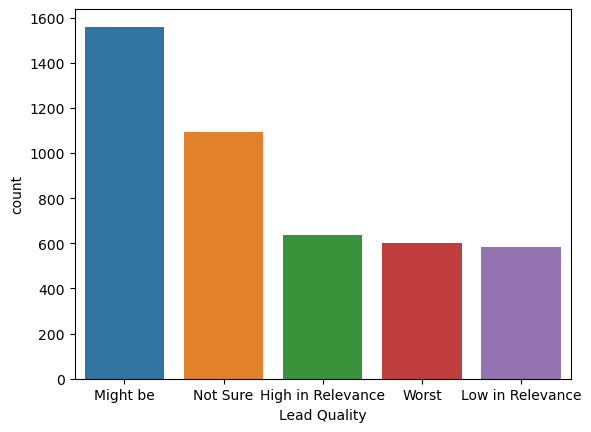

In [34]:
# lets make a bar plot
Lead_data=data["Lead Quality"].value_counts().reset_index()
Lead_data.columns=["Lead Quality","count"]

sns.barplot(x="Lead Quality",y="count",data=Lead_data)
plt.show()

In [35]:
data["Lead Quality"].isnull().sum()

4767

In [ ]:
# we are not sure about the client lead quality , we should handle the missing with Not Sure

In [36]:
data["Lead Quality"]=data["Lead Quality"].replace(np.nan,"Not Sure")

In [ ]:
# EDA of country

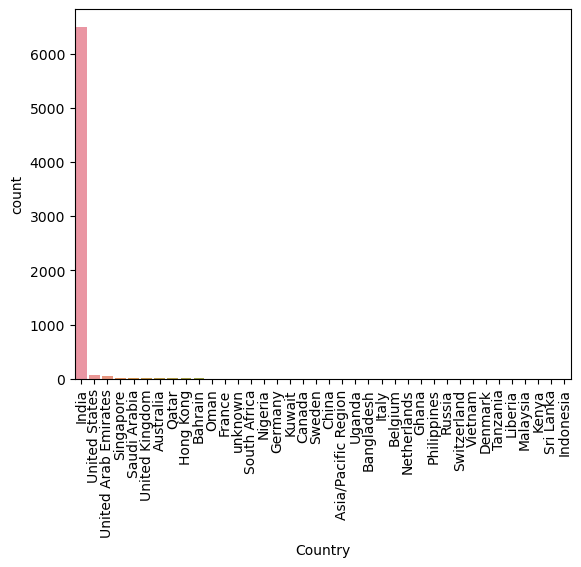

In [40]:
# lets make a bar plot
country_data=data["Country"].value_counts().reset_index()
country_data.columns=["Country","count"]
xticks(rotation=90)
sns.barplot(x="Country",y="count",data=country_data)
plt.show()

In [41]:
data["Country"].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [ ]:
# the country column has 95% data from India.


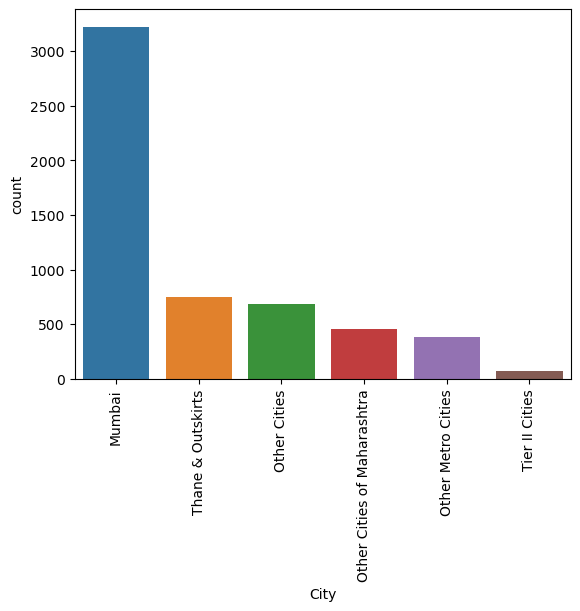

In [42]:
# lets make a bar plot
city_data=data["City"].value_counts().reset_index()
city_data.columns=["City","count"]
xticks(rotation=90)
sns.barplot(x="City",y="count",data=city_data)
plt.show()

In [43]:
data["City"].isnull().sum()

3669

In [45]:
data["City"]=data["City"].replace(np.nan,"Mumbai")

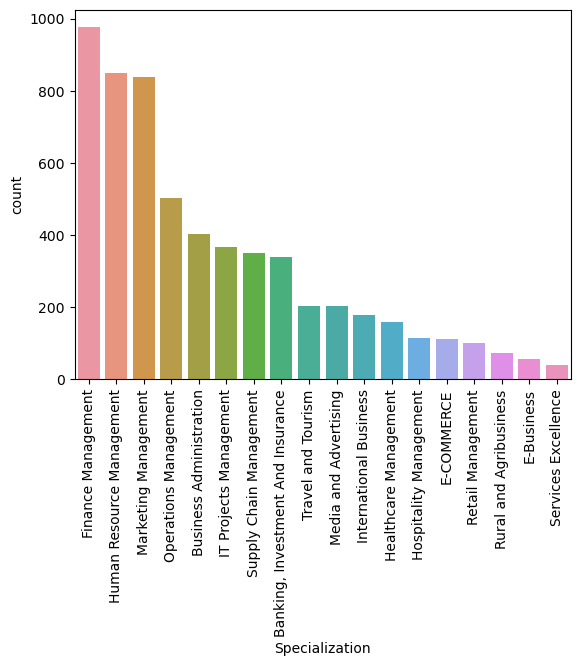

In [46]:
# lets make a bar plot
city_data=data["Specialization"].value_counts().reset_index()
city_data.columns=["Specialization","count"]
xticks(rotation=90)
sns.barplot(x="Specialization",y="count",data=city_data)
plt.show()

In [47]:
data["Specialization"].isnull().sum()

3380

In [49]:
data["Specialization"]=data["Specialization"].replace(np.nan,"Others")

In [50]:
data["Specialization"].value_counts()

Finance Management                   4356
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [52]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [53]:
high_null1=data.isnull().sum()/len(data)
high_null1.sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Lead Quality                                     0.000000
Update me on Supply Chain Content                0.000000
Lead Origin                                      0.000000
Get updates on DM Content                        0.000000
Through Recommendations                          0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of

In [56]:
high_missing=high_null1[high_null1>0.70].index
high_missing

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [57]:
data=data.drop(high_missing,axis=1)

In [58]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

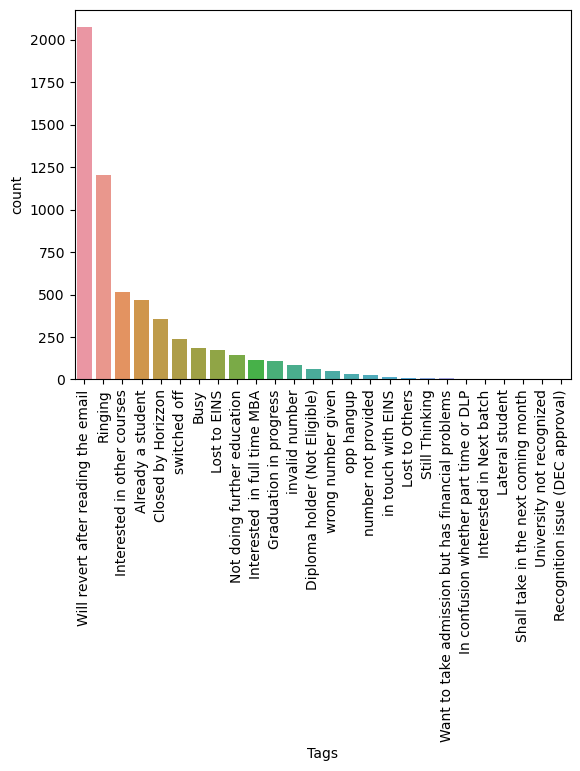

In [59]:
# lets make a bar plot
city_data=data["Tags"].value_counts().reset_index()
city_data.columns=["Tags","count"]
xticks(rotation=90)
sns.barplot(x="Tags",y="count",data=city_data)
plt.show()

In [60]:
data["Tags"]=data["Tags"].replace(np.nan,"No comments")

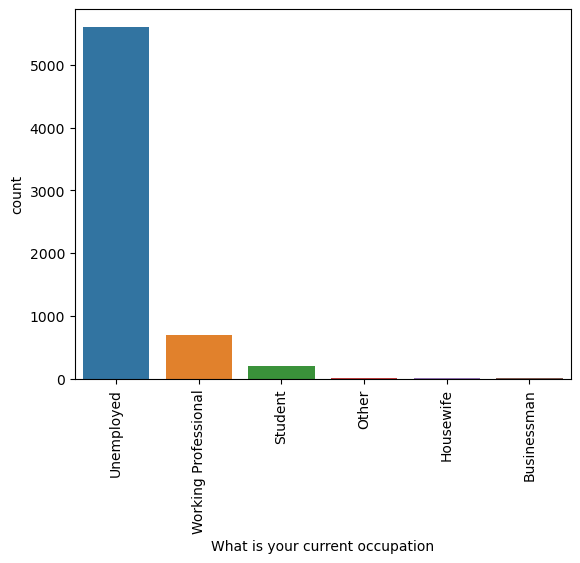

In [61]:
# lets make a bar plot
city_data=data["What is your current occupation"].value_counts().reset_index()
city_data.columns=["What is your current occupation","count"]
xticks(rotation=90)
sns.barplot(x="What is your current occupation",y="count",data=city_data)
plt.show()

In [62]:
data["What is your current occupation"]=data["What is your current occupation"].replace(np.nan,"Other")

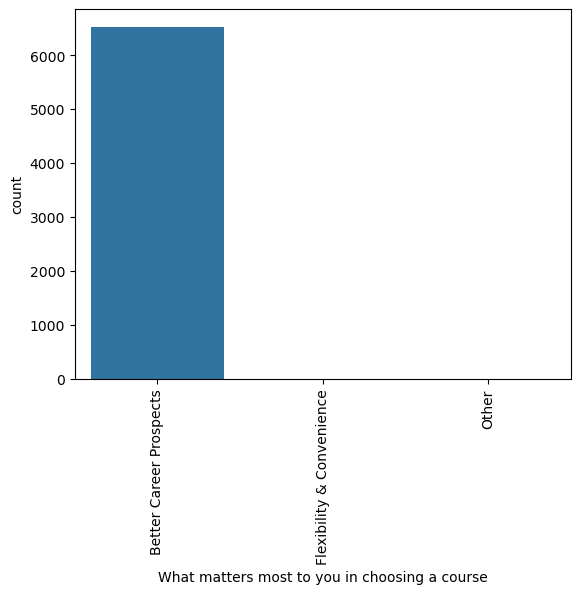

In [63]:
# lets make a bar plot
city_data=data["What matters most to you in choosing a course"].value_counts().reset_index()
city_data.columns=["What matters most to you in choosing a course","count"]
xticks(rotation=90)
sns.barplot(x="What matters most to you in choosing a course",y="count",data=city_data)
plt.show()

In [64]:
data["What matters most to you in choosing a course"]=data["What matters most to you in choosing a course"].replace(np.nan,"Other")

In [66]:
data["Country"]=data["Country"].replace(np.nan,"India")

In [67]:
data.isnull().sum()/len(data)

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [68]:
data=data.dropna()

In [69]:
data.isnull().sum().sum()

0

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [71]:
data["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

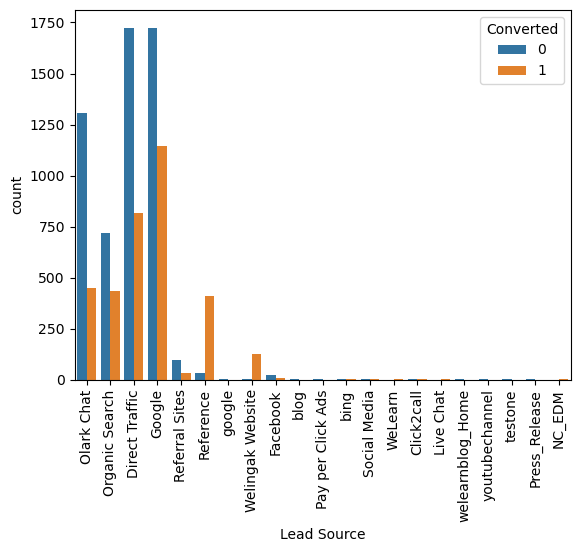

In [74]:
sns.countplot(x="Lead Source",hue="Converted",data=data)
xticks(rotation=90)
plt.show()

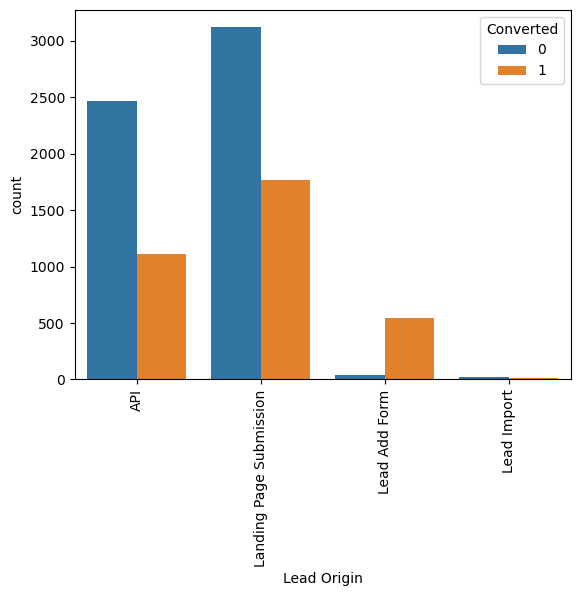

In [75]:
sns.countplot(x="Lead Origin",hue="Converted",data=data)
xticks(rotation=90)
plt.show()

In [ ]:
# please complete the EDA with respect to all columns